# Modèle de langage probabiliste neuronal
Un modèle de langage probabiliste neuronal, souvent appelé MNPL (ou NPLP en anglais pour "Neural Probabilistic Language Model"), est un type de modèle qui utilise des réseaux de neurones pour modéliser la probabilité de séquences de mots dans un langage donné.

Mathématiquement, cela peut être formulé comme suit :

Soit $W = (w_1, w_2, ..., w_n)$ une séquence de mots, où $w_i$ représente le i-ème mot de la séquence. L'objectif est de trouver la probabilité conditionnelle de la séquence entière :

$$P(W) = P(w_1) \cdot P(w_2|w_1) \cdot P(w_3|w_1, w_2) \cdot \ldots \cdot P(w_n|w_1, w_2, ..., w_{n-1})$$

Un MNPL utilise un réseau de neurones pour estimer ces probabilités conditionnelles. Il prend en entrée une séquence de mots $w_1, w_2, ..., w_{i-1}$ et produit une distribution de probabilité sur le mot suivant $w_i$. Cela peut être représenté par la fonction $F$ dépendant des paramètres $\theta$ du modèle :

$$P(w_i|w_1, w_2, ..., w_{i-1}; \theta) = F(w_i, w_1, w_2, ..., w_{i-1}; \theta)$$

Le modèle est ensuite entraîné sur un corpus de texte pour ajuster les poids $\theta$ afin de minimiser la perte, généralement la perte d'entropie croisée, entre les prédictions du modèle et les mots réels observés dans les données d'entraînement.

En résumé, un MNPL utilise un réseau de neurones pour estimer la probabilité d'une séquence de mots en se basant sur les mots précédents dans la séquence. Il est entraîné sur des données textuelles pour apprendre les relations entre les mots et prédire la séquence la plus probable.

# Perceptron à Plusieurs Couches (MLP)
Un modèle de langage probabiliste basé sur un Perceptron à Plusieurs Couches (MLP) de longueur fixe implique de représenter chaque mot dans la séquence comme un vecteur de longueur fixe, puis d'utiliser un réseau neuronal feedforward pour prédire le mot suivant dans la séquence.

Voici les étapes pour le mettre en œuvre :

1. **Incorporation de Mots** :
   - Chaque mot du vocabulaire est représenté sous forme de vecteur de longueur fixe. Cela peut être réalisé en utilisant des embeddings de mots pré-entraînés tels que Word2Vec, GloVe, ou en apprenant les embeddings en tant que partie du modèle.
   - Soit $E$ la matrice d'incorporation, où chaque colonne représente l'embedding d'un mot particulier.

   $$E = \begin{bmatrix} e(m_1) & e(m_2) & \ldots & e(m_v) \end{bmatrix}$$

   Ici, $e(m_i)$ est le vecteur d'incorporation pour le i-ème mot du vocabulaire.

2. **Représentation de l'Entrée** :
   - Étant donné une séquence de mots $M = (m_1, m_2, ..., m_n)$, convertissez chaque mot en son vecteur d'incorporation correspondant.

   $$X = \begin{bmatrix} e(m_1) \\ e(m_2) \\ \vdots \\ e(m_n) \end{bmatrix}$$

   Où $X$ est la matrice d'entrée, chaque ligne correspondant au vecteur d'incorporation d'un mot dans la séquence.

3. **Réseau de Neurones Feedforward (MLP)** :
   - Définissez un réseau de neurones feedforward avec une ou plusieurs couches cachées. Ce réseau prendra la séquence d'entrée incorporée $X$ et produira une distribution de probabilité sur le vocabulaire pour le mot suivant.

   $$Y = \sigma(W_{sortie} \cdot \sigma(W_h \cdot X + b_h) + b_{sortie})$$

   Où :
   - $W_h$ est la matrice de poids de la/les couche(s) cachée(s).
   - $b_h$ est le vecteur de biais de la/les couche(s) cachée(s).
   - $W_{sortie}$ est la matrice de poids de la couche de sortie.
   - $b_{sortie}$ est le vecteur de biais de la couche de sortie.
   - $\sigma$ représente la fonction d'activation (par exemple, ReLU, sigmoïde, etc.).

4. **Probabilité de Sortie** :
   - Appliquez une fonction d'activation softmax à la couche de sortie pour obtenir une distribution de probabilité sur le vocabulaire.

   $$P(m_i|m_1, m_2, ..., m_{i-1}) = \frac{e^{y_i}}{\sum_{j=1}^{v} e^{y_j}}$$

   Où $y_i$ est le i-ème élément du vecteur de sortie $Y$, et $v$ est la taille du vocabulaire.

5. **Entraînement** :
   - Entraînez le modèle en utilisant une fonction de perte appropriée (par exemple, perte de l'entropie croisée) et un optimiseur (par exemple, descente de gradient stochastique) pour minimiser la différence entre les probabilités prédites et les mots réels dans les données d'entraînement.

6. **Prédiction** :
   - Lors de la prédiction, générer le mot suivant en échantillonnant à partir de la distribution de probabilité de sortie.

Cette approche permet au modèle d'apprendre des relations complexes entre les mots dans une représentation de longueur fixe, ce qui peut être utile pour des tâches telles que la génération de texte, le complément de texte, et plus encore. Il est important de choisir une architecture appropriée, des hyperparamètres et une dimension d'incorporation pour les performances optimales du modèle.

In [1]:
#!gdown --id 1ry2NnU10U2JIxWzjGWhfxbdB0vtM2e1-
#!unzip corpus.zip

In [2]:
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:


def load(filepath, window_size, vocab_size=None):

    words = []
    with open(filepath, 'r', encoding='utf8') as file:
        for line in file:
            words += word_tokenize(line.strip())


    x_train, y_train = [], []
    for i in range(len(words) - window_size + 1):
        x_train.append(words[i: i + window_size - 1])
        y_train.append(words[i +  window_size - 1])

    vocab = [word[0] for word in Counter(words).most_common(vocab_size)]
    word2id = { vocab[i]: i for i in range(len(vocab)) }

    return np.array(x_train), np.array(y_train)[:,None], np.array(vocab), word2id

def convert_to_id(x_train, y_train, vocab):

    word_to_id = {}
    for i, vocab in enumerate(vocab):
        word_to_id[vocab] = i

    for i in range(len(x_train)):
        x_train[i] = [word_to_id[word] for word in x_train[i]]
        y_train[i] = word_to_id[y_train[i][0]]

    return x_train.astype(int), y_train.astype(int)



In [4]:
filepath = 'corpus/text8-less.txt'

In [5]:
# hyperparamètre
batch_size = 256
window_size = 5
vocab_size = None
hidden_size = 10
emb_dim = 50
learning_rate = 0.8
epoch_size = 1

In [6]:
x_raw, y_raw, vocab, word2id = load(filepath, window_size, vocab_size)
vocab_size = len(vocab)
print('Taille du vocabulaire: {}'.format(vocab_size))

Taille du vocabulaire: 101100


In [7]:
x_train, y_train = convert_to_id(x_raw, y_raw, vocab)
print('Longueur: {}'.format(len(x_train)))
print('Nombre de lots: {}'.format(len(x_train) / batch_size))

Longueur: 3304388
Nombre de lots: 12907.765625


## DataLoader
Un DataLoader en PyTorch est un composant qui facilite le chargement et la gestion de données pour l'entraînement de modèles d'apprentissage automatique. Il prend un Dataset (ensemble de données) en entrée et permet de diviser les données en lots (batches), de les mélanger et de les fournir au modèle pour l'entraînement.



In [8]:
from torch.utils.data import TensorDataset, DataLoader

x_train= torch.Tensor(x_train)
y_train  = torch.Tensor(y_train)

my_dataset = TensorDataset(x_train,y_train)
train_loader = DataLoader(my_dataset,batch_size=batch_size)

# Création du réseau de neurones (MLP) dans Pytorch

1. Import des bibliothèques :
   - `import torch` : Importe la bibliothèque PyTorch.
   - `import torch.nn as nn` : Importe les modules de réseaux neuronaux de PyTorch.

2. Définition de la classe `ModeleLangageProbabiliste` :
   - Cette classe hérite de `nn.Module` et contient les composants du modèle.

3. Méthode `__init__` :
   - Initialise le modèle en définissant ses couches et modules.
   - `self.incorporation` : Une couche d'incorporation qui convertit les indices de mots en vecteurs d'incorporation.
   - `self.mlp` : Un réseau de neurones feedforward composé de deux couches linéaires avec une fonction d'activation ReLU entre elles.

4. Méthode `forward` :
   - Définit le passage avant du modèle, c'est-à-dire comment les données sont traitées lorsqu'elles passent à travers le réseau.
   - `sequence_entree` : La séquence de mots en entrée.

5. Initialisation d'un exemple de modèle :
   - `modele = ModeleLangageProbabiliste(taille_vocabulaire, dimension_embedding, dimension_cachee)` : Crée une instance du modèle avec les hyperparamètres spécifiés.

6. Génération d'une séquence d'entrée :
   - `sequence_entree = torch.randint(0, taille_vocabulaire, (3, 10))` : Génère une séquence d'indices de mots aléatoires pour illustrer un exemple.

7. Passe avant (Forward pass) :
   - `sortie = modele(sequence_entree)` : Passe la séquence d'entrée à travers le modèle pour obtenir la sortie.

8. Affichage de la forme de la sortie :
   - `print(sortie.shape)` : Affiche la forme de la sortie, qui sera de la forme (taille du lot, longueur de la séquence, taille du vocabulaire).

In [9]:
class ModeleLangageProbabiliste(nn.Module):
    def __init__(self, taille_vocabulaire, dimension_embedding, dimension_cachee,seq_len):
        super(ModeleLangageProbabiliste, self).__init__()
        self.incorporation = nn.Embedding(taille_vocabulaire, dimension_embedding)
        self.mlp = nn.Sequential(
            nn.Linear(dimension_embedding*seq_len, dimension_cachee),
            nn.ReLU(),
            nn.Linear(dimension_cachee, taille_vocabulaire)
        )

    def forward(self, sequence_entree):
        bs,seq_len=sequence_entree.shape
        embeddee = self.incorporation(sequence_entree).view(bs,-1)
        sortie = self.mlp(embeddee)
        return sortie



In [10]:
model = ModeleLangageProbabiliste(vocab_size, emb_dim , hidden_size,window_size-1).cuda()


In [11]:

num_epochs=10
# Définir la fonction de perte et l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Boucle d'entraînement
for epoch in range(num_epochs):
    total_loss = 0
    for input_seq, target_word in tqdm(train_loader):  # Itérer sur des lots
        optimizer.zero_grad()
        input_seq, target_word=input_seq.cuda().long(), target_word.long().cuda()
        output = model(input_seq)

        # Aplatir la sortie et cibler la perte de calcul
        output = output.view(-1, vocab_size)
        target_word = target_word.view(-1)

        loss = criterion(output, target_word)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Calculer et imprimer la perte moyenne pour l'époque
    average_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}')

print('Formation terminée!')


  0%|          | 0/12908 [00:00<?, ?it/s]

Epoch [1/10], Loss: 22.0117


  0%|          | 0/12908 [00:00<?, ?it/s]

Epoch [2/10], Loss: 10.1474


  0%|          | 0/12908 [00:00<?, ?it/s]

Epoch [3/10], Loss: 9.6542


  0%|          | 0/12908 [00:00<?, ?it/s]

Epoch [4/10], Loss: 9.5771


  0%|          | 0/12908 [00:00<?, ?it/s]

Epoch [5/10], Loss: 9.5579


  0%|          | 0/12908 [00:00<?, ?it/s]

Epoch [6/10], Loss: 9.4962


  0%|          | 0/12908 [00:00<?, ?it/s]

Epoch [7/10], Loss: 9.2292


  0%|          | 0/12908 [00:00<?, ?it/s]

Epoch [8/10], Loss: 9.2383


  0%|          | 0/12908 [00:00<?, ?it/s]

Epoch [9/10], Loss: 9.1560


  0%|          | 0/12908 [00:00<?, ?it/s]

Epoch [10/10], Loss: 9.1891
Formation terminée!


In [12]:
word_embedding=model.incorporation.weight.detach().cpu().numpy()
print(word_embedding.shape)

(101100, 50)


Pour visualiser des embeddings de mots en utilisant l'analyse en composantes principales (PCA)

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(n_components=2)
wordemb_2D = pca.fit_transform(word_embedding)

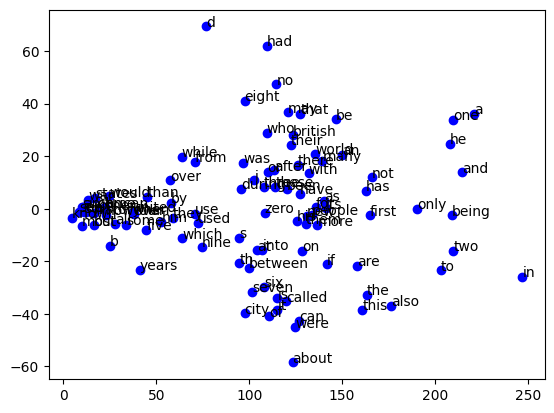

In [19]:
n = 100
x_coords = wordemb_2D[:n, 0]
y_coords = wordemb_2D[:n, 1]

plt.scatter(x_coords, y_coords, c='b')
for label, x, y in zip(vocab[:n], x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

Pour trouver les mots les plus similaires à une requête en utilisant des embeddings de mots et la similarité cosinus, suivez ces étapes :

1. **Obtention des Embeddings de Mots** :
   - Commencez par obtenir les embeddings de mots. Vous pouvez les obtenir à partir de modèles pré-entraînés comme Word2Vec, GloVe, ou en les entraînant vous-même sur vos propres données.

2. **Calcul de la Similarité Cosinus** :
   - La similarité cosinus mesure la similarité directionnelle entre deux vecteurs. Elle est calculée comme le cosinus de l'angle entre les deux vecteurs. Plus les vecteurs sont similaires, plus le cosinus sera proche de 1.

3. **Normalisation des Vecteurs** :
   - Il est important de normaliser les embeddings de mots avant de calculer la similarité cosinus. Cela garantit que la similarité mesure la similarité directionnelle plutôt que la magnitude des vecteurs.

4. **Calcul de la Similarité Cosinus** :
   - Pour chaque mot dans votre vocabulaire, calculez la similarité cosinus avec la requête en utilisant la formule :

   $$
   \text{Similarité Cosinus} = \frac{{\mathbf{A} \cdot \mathbf{B}}}{{\|\mathbf{A}\| \|\mathbf{B}\|}}
   $$

   Où $\mathbf{A}$ est l'embedding du mot dans le vocabulaire, $\mathbf{B}$ est l'embedding de la requête et $\|\cdot\|$ représente la norme euclidienne (magnitude) du vecteur.

5. **Trier par Similarité** :
   - Triez les mots en fonction de leur similarité cosinus avec la requête, en ordre décroissant. Les mots les plus similaires auront les scores de similarité les plus élevés.

6. **Sélection des Mots Similaires** :
   - Sélectionnez les mots avec les scores de similarité les plus élevés comme étant les mots les plus similaires à la requête.


In [18]:
from pprint import pprint

def cosine_similarity(wordvec1, wordvec2):
    return np.dot(wordvec1, wordvec2) / (np.linalg.norm(wordvec1) * np.linalg.norm(wordvec2))

def distance(wordvec1, wordvec2):
    return (np.linalg.norm(wordvec1 - wordvec2))

def most_similar(word_embedding, word):

    target = word2id[word]
    n = 10
    top10 = [('', 100000) for i in range(n)]


    for i in range(len(word_embedding)):
        if i == target:
            continue

        sim = distance(word_embedding[target], word_embedding[i])
        for j in range(n):
            if sim <= top10[j][1]:
                top10[j+1:] = top10[j:-1]
                top10[j] = (vocab[i], sim)
                break
    pprint(top10)

most_similar(word_embedding, 'politics')

[('rock', 33.089005),
 ('enjoys', 34.216805),
 ('nymph', 34.553036),
 ('toward', 35.622116),
 ('useful', 35.72428),
 ('chickasaw', 37.224613),
 ('heavy', 37.229446),
 ('alge', 37.24871),
 ('persian', 37.48251),
 ('adenosine', 37.537918)]
